## Import required libraries

In [3686]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

## Load the dataset

In [3687]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3688]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Check the shape of the dataset

In [3689]:
df.shape

(13320, 9)

## Check the statistical data of dataframe

In [3690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3691]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## Data Preprocessing

In [3692]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

### Check for missing values

In [3693]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Since location, size, bath, balcony, society column have high no of missing values and low relevance to Price prediction, Hence we are dropping irrelevant columns

In [3694]:
df = df.drop(columns=['area_type', 'society', 'availability'], axis=1)

In [3695]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Checking the missing values

In [3696]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Let's fill missing values in key columns using median (for numericals) or mode (for categoricals)

In [3697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [3698]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

There was only one missing value in the location column, which was filled with 'Whitefield', the most frequent location. This maintains data consistency.

In [3699]:
df['location'] = df['location'].fillna('Whitefield')

In [3700]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The size column has only 16 missing values, which are filled with the most frequent value, 2 BHK, to maintain consistency.

In [3701]:
df['size'] = df['size'].fillna('2 BHK')

In [3702]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [3703]:
df['bath'].median() 

2.0

In [3704]:
# bathroom has 73 null values so we will replace them my median value.
df['bath'] = df['bath'].fillna(df['bath'].median())

In [3705]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [3706]:
df['balcony'].median() 

2.0

In [3707]:
# balcony has 609 null values so we will replace them my median value.
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [3708]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [3709]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [3710]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [3711]:
## Let's split the no of bedroom from size column

df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [3712]:
df['BHK']=df['BHK'].astype(float)

In [3713]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [3714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
 6   BHK         13320 non-null  float64
dtypes: float64(4), object(3)
memory usage: 728.6+ KB


In [3715]:
df.describe()

,bath,balcony,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627,2.802778
std,1.338754,0.803067,148.971674,1.294496
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [3716]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### 'total_sqft' has some range value.lets deal with these values

In [3717]:
## Lets create a function to get agg of two numbers for a range of total-sqft
def ConvertRange(x):

    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[0]))/2
    try:
        return float(x)
    except:
        return None

In [3718]:
df['total_sqft'] = df['total_sqft'].apply(ConvertRange)

In [3719]:
df.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

### Creating the price_per_sqft Feature
A new column, price_per_sqft, is added to represent the price per square foot for each property. This feature enables more effective comparison of property values across different locations and sizes.

In [3720]:
df['price_per_sqft'] = round(df['price']*100000 / df['total_sqft'],2)

In [3721]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.00


In [3722]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1556.594994,2.688814,1.603378,112.565627,2.802778,7.917375e+03
std,1236.094294,1.338754,0.803067,148.971674,1.294496,1.064295e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.271963e+03
50%,1275.000000,2.000000,2.000000,72.000000,3.000000,5.447030e+03
75%,1677.750000,3.000000,2.000000,120.000000,3.000000,7.327290e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [3723]:
df.isnull().sum()

location           0
size               0
total_sqft        46
bath               0
balcony            0
price              0
BHK                0
price_per_sqft    46
dtype: int64

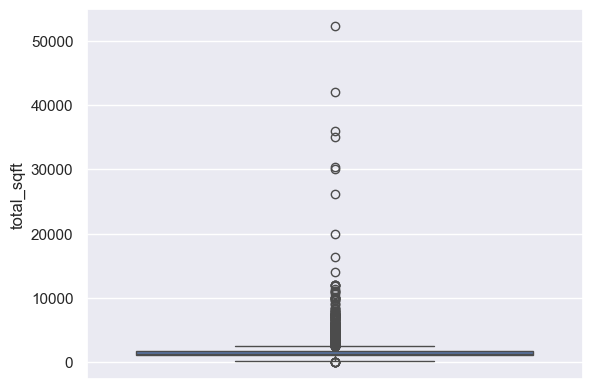

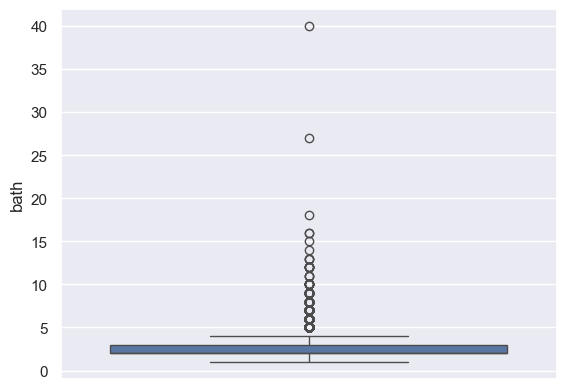

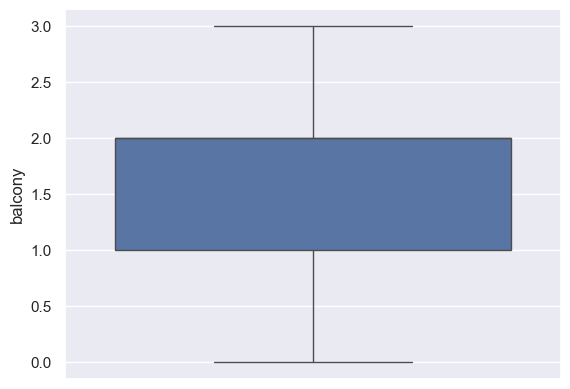

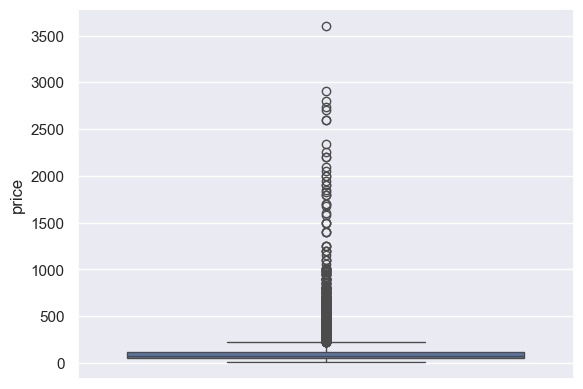

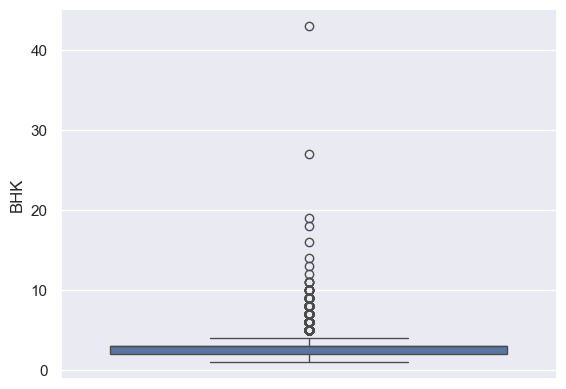

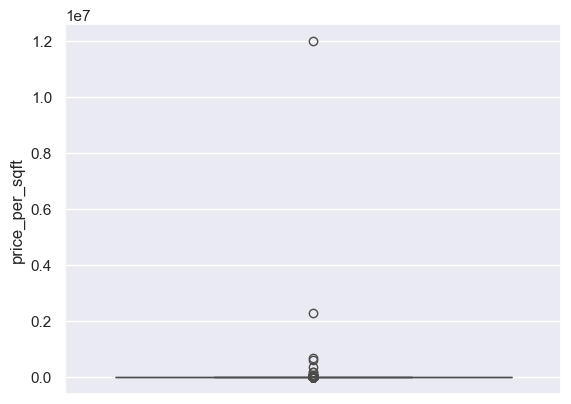

In [3724]:
### Checking outlier for numerical columns
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = ['object']).columns):
    boxplot(i)

In [3725]:
## lets create a function to remove outlier
def remove_outliers_iqr(df, column, multiplier=1.5):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter dataframe
    df_cleaned = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    # Optional: Print removed rows count
    removed_rows = len(df) - len(df_cleaned)
    print(f"Removed {removed_rows} outliers from {column}")
    
    return df_cleaned

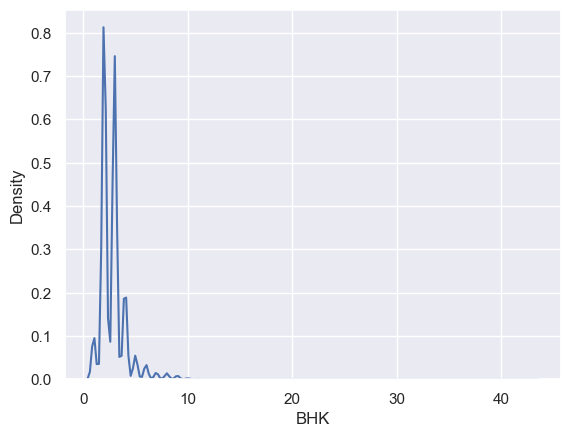

In [3726]:
## Lets remove outliers of BHK
sns.kdeplot(df['BHK'])
plt.show()

In [3727]:
df = remove_outliers_iqr(df, 'BHK')

Removed 846 outliers from BHK


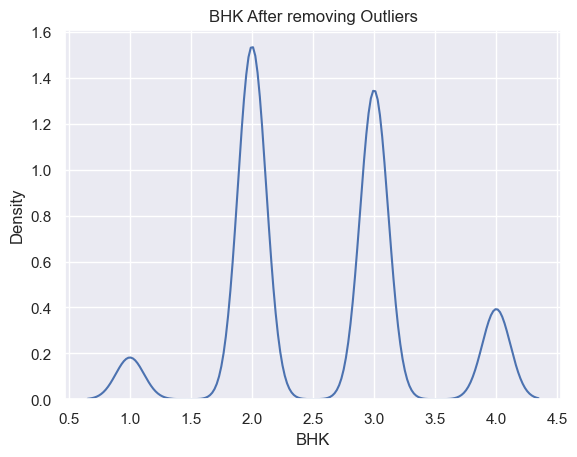

In [3728]:
sns.kdeplot(df['BHK'])
plt.title('BHK After removing Outliers')
plt.show()

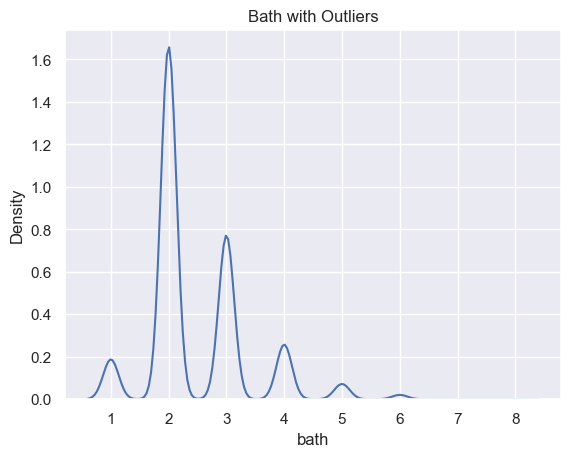

In [3729]:
## Lets remove outliers of bath
sns.kdeplot(df['bath'])
plt.title('Bath with Outliers')
plt.show()

In [3730]:
df = remove_outliers_iqr(df, 'bath')

Removed 391 outliers from bath


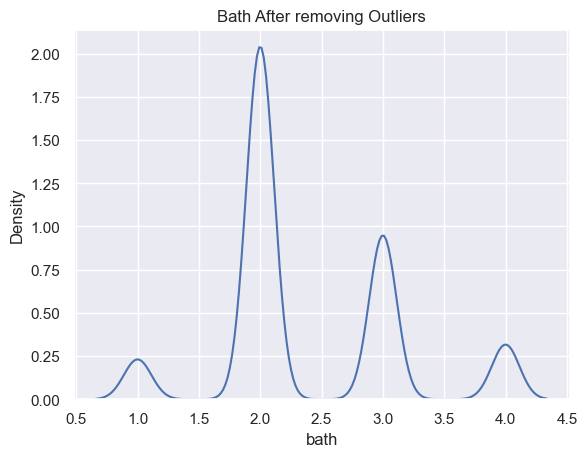

In [3731]:
sns.kdeplot(df['bath'])
plt.title('Bath After removing Outliers')
plt.show()

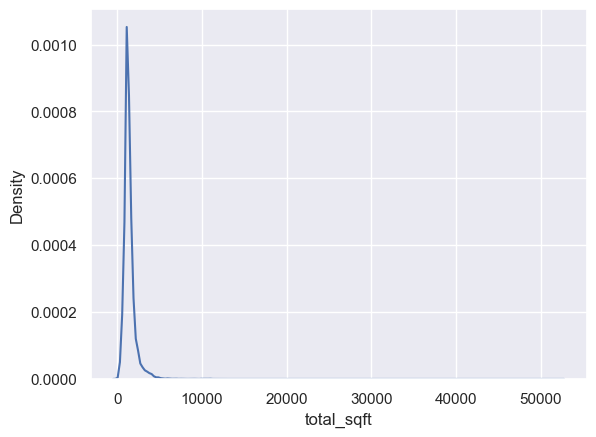

In [3732]:
sns.kdeplot(df['total_sqft'])
plt.show()

In [3733]:
df = remove_outliers_iqr(df, 'total_sqft')

Removed 953 outliers from total_sqft


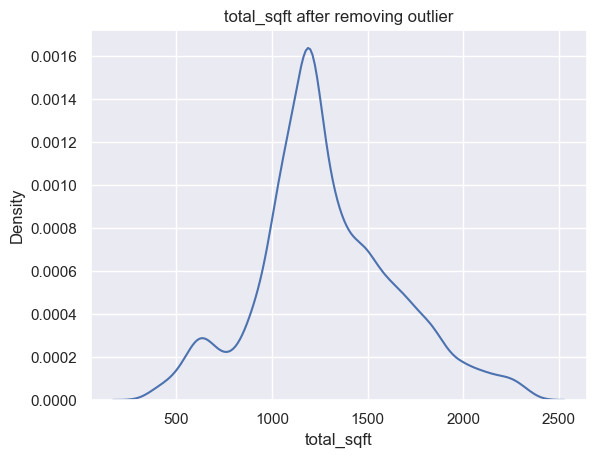

In [3734]:
sns.kdeplot(df['total_sqft'])
plt.title('total_sqft after removing outlier')
plt.show()

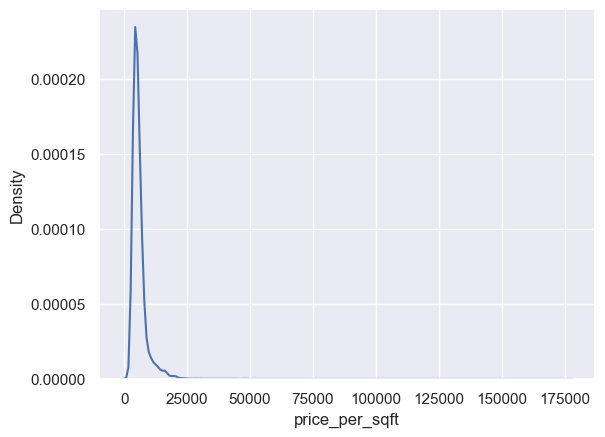

In [3735]:
sns.kdeplot(df['price_per_sqft'])
plt.show()

In [3736]:
df = remove_outliers_iqr(df, 'price_per_sqft')


Removed 774 outliers from price_per_sqft


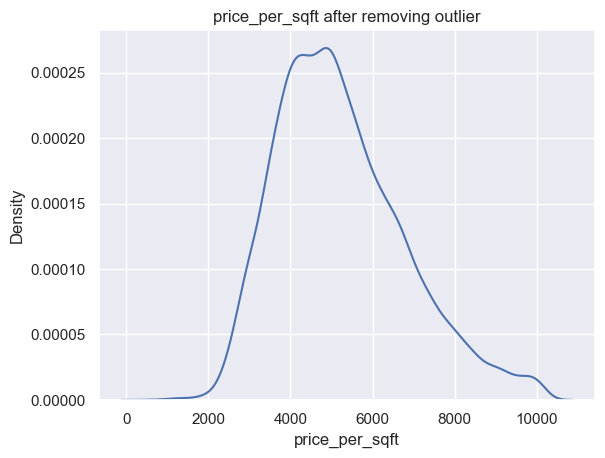

In [3737]:
sns.kdeplot(df['price_per_sqft'])
plt.title('price_per_sqft after removing outlier')
plt.show()

In [3738]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [3739]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,1288.725463,2.250290,1.568849,68.892735,2.395616,5225.757476
std,351.762908,0.620684,0.766759,32.771303,0.636425,1564.566015
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,1.000000,45.500000,2.000000,4060.872500
50%,1230.000000,2.000000,2.000000,60.805000,2.000000,5000.000000
75%,1500.000000,3.000000,2.000000,85.000000,3.000000,6181.820000
max,2357.000000,4.000000,3.000000,225.000000,4.000000,10135.140000


In [3740]:
df['location'].value_counts()

location
Whitefield             424
Sarjapur  Road         326
Electronic City        293
Kanakpura Road         263
Thanisandra            221
                      ... 
2nd Block Jayanagar      1
Ganesha Block            1
Seshadripuram            1
Kavika Layout            1
Sarvobhogam Nagar        1
Name: count, Length: 1021, dtype: int64

In [3741]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [3742]:
df['location'].value_counts()

location
Whitefield             425
Sarjapur  Road         326
Electronic City        295
Kanakpura Road         263
Thanisandra            224
                      ... 
Rajanna Layout           1
2nd Block Jayanagar      1
Ganesha Block            1
Seshadripuram            1
Sarvobhogam Nagar        1
Name: count, Length: 1012, dtype: int64

In [3743]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              425
Sarjapur  Road          326
Electronic City         295
Kanakpura Road          263
Thanisandra             224
                       ... 
Kalkere Channasandra      1
Kadarenahalli             1
KPC Layout                1
KHB Colony Extension      1
whitefiled                1
Name: location, Length: 1012, dtype: int64

In [3744]:
locations_less_than_10_entries = location_stats[location_stats<=10]
locations_less_than_10_entries

location
Nehru Nagar             10
Kumaraswami Layout      10
Gunjur Palya            10
Narayanapura            10
Sultan Palaya           10
                        ..
Kalkere Channasandra     1
Kadarenahalli            1
KPC Layout               1
KHB Colony Extension     1
whitefiled               1
Name: location, Length: 820, dtype: int64

In [3745]:
df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_less_than_10_entries else x )

In [3746]:
df['location'].value_counts()

location
Other                        2191
Whitefield                    425
Sarjapur  Road                326
Electronic City               295
Kanakpura Road                263
                             ... 
Kodigehaali                    11
2nd Phase Judicial Layout      11
Banashankari Stage V           11
OMBR Layout                    11
Pattandur Agrahara             11
Name: count, Length: 193, dtype: int64

In [3747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10356 non-null  object 
 1   size            10356 non-null  object 
 2   total_sqft      10356 non-null  float64
 3   bath            10356 non-null  float64
 4   balcony         10356 non-null  float64
 5   price           10356 non-null  float64
 6   BHK             10356 non-null  float64
 7   price_per_sqft  10356 non-null  float64
dtypes: float64(6), object(2)
memory usage: 728.2+ KB


In [3748]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,1288.725463,2.250290,1.568849,68.892735,2.395616,5225.757476
std,351.762908,0.620684,0.766759,32.771303,0.636425,1564.566015
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,1.000000,45.500000,2.000000,4060.872500
50%,1230.000000,2.000000,2.000000,60.805000,2.000000,5000.000000
75%,1500.000000,3.000000,2.000000,85.000000,3.000000,6181.820000
max,2357.000000,4.000000,3.000000,225.000000,4.000000,10135.140000


In [3749]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.81
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.00
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.0,3247.86


In [3750]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,1288.725463,2.250290,1.568849,68.892735,2.395616,5225.757476
std,351.762908,0.620684,0.766759,32.771303,0.636425,1564.566015
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,1.000000,45.500000,2.000000,4060.872500
50%,1230.000000,2.000000,2.000000,60.805000,2.000000,5000.000000
75%,1500.000000,3.000000,2.000000,85.000000,3.000000,6181.820000
max,2357.000000,4.000000,3.000000,225.000000,4.000000,10135.140000


In [3751]:
df.shape

(10356, 8)

In [3752]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,1288.725463,2.250290,1.568849,68.892735,2.395616,5225.757476
std,351.762908,0.620684,0.766759,32.771303,0.636425,1564.566015
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,1.000000,45.500000,2.000000,4060.872500
50%,1230.000000,2.000000,2.000000,60.805000,2.000000,5000.000000
75%,1500.000000,3.000000,2.000000,85.000000,3.000000,6181.820000
max,2357.000000,4.000000,3.000000,225.000000,4.000000,10135.140000


In [3753]:
df = df.drop(columns=['size','price_per_sqft'], axis=1)

In [3754]:
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
5,Whitefield,1170.0,2.0,1.0,38.00,2.0


In [3755]:
df.shape

(10356, 6)

In [3756]:
## Save the cleaned data to a csv file
df.to_csv("Cleaned_data.csv")

### Correlation Matrix

In [3757]:
num_featrures = df.select_dtypes(include='number')
corr = num_featrures.corr()
corr

,total_sqft,bath,balcony,price,BHK
total_sqft,1.000000,0.729176,0.356068,0.781631,0.719732
bath,0.729176,1.000000,0.302864,0.613444,0.773163
balcony,0.356068,0.302864,1.000000,0.215052,0.294162
price,0.781631,0.613444,0.215052,1.000000,0.546935
BHK,0.719732,0.773163,0.294162,0.546935,1.000000


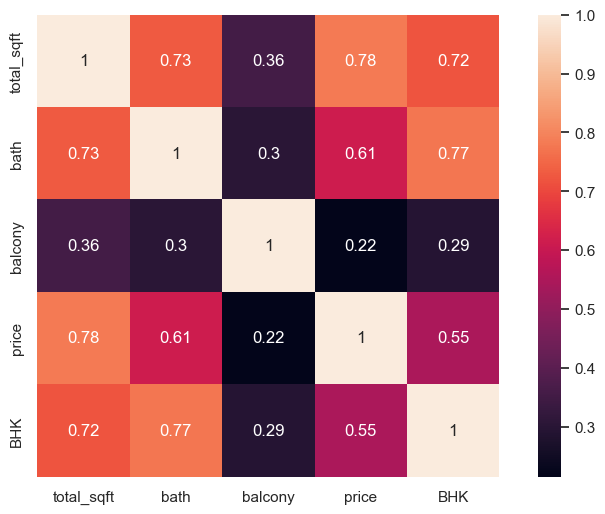

In [3758]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, square=True)
plt.show()

In [3770]:
## Split the data features and target variable
X = df.drop(columns=['price'])
y = df['price']
X.shape, y.shape

((10356, 5), (10356,))

## Model Building

In [3771]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [3772]:
## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3762]:
print(X_train.shape)
print(X_test.shape)

(8284, 5)
(2072, 5)


In [3773]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

1. OneHotEncoder() converts categorical data into binary columns
2. sparse_output=False means the output will be a dense array instead of a sparse matrix
3. 'location' specifies that this encoding should be applied to the 'location' column

In [3774]:
## Normalize the numerical features
scaler = StandardScaler()

### Linear Regression Model

In [3775]:
## Instantiate Linear regression model
lr = LinearRegression()

In [3776]:
## Create pipeline
pipe_lr = make_pipeline(column_trans, scaler, lr)

In [3777]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Evaluation

In [3778]:
def evaluate_model(y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R2 score: {r2:.4f}")
    print(f"mse score: {mse:.4f}")
    print(f"RMSE score: {rmse:.4f}")

In [3781]:
# Making Predictions and Evaluate
y_pred_lr = pipe_lr.predict(X_test)
evaluate_model(y_pred_lr)

R2 score: 0.6816
mse score: 357.2318
RMSE score: 18.9006


### Lasso

In [3782]:
lasso = Lasso()
# Create Pipeline
pipe = make_pipeline(column_trans, scaler, lasso)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [3783]:
y_pred_lasso = pipe.predict(X_test)
evaluate_model(y_pred_lasso)

R2 score: 0.6306
mse score: 414.5602
RMSE score: 20.3608


### Ridge

In [3784]:
ridge = Ridge()
# Create Pipeline
pipe = make_pipeline(column_trans, scaler, ridge)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [3785]:
y_pred_rd=pipe.predict(X_test)
evaluate_model(y_pred_rd)

R2 score: 0.6812
mse score: 357.6787
RMSE score: 18.9124


### Random Forest Classifier

In [3786]:
rfc=RandomForestRegressor()
pipe=make_pipeline(column_trans,scaler,rfc)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [3787]:
y_pred_rf=pipe.predict(X_test)
evaluate_model(y_pred_rf)

R2 score: 0.7070
mse score: 328.7478
RMSE score: 18.1314


### XGBoostClassifier Model

In [3788]:
xgb=XGBRegressor()
pipe=make_pipeline(column_trans,scaler,xgb)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [3789]:
y_pred_xgb=pipe.predict(X_test)
evaluate_model(y_pred_xgb)

R2 score: 0.7225
mse score: 311.4092
RMSE score: 17.6468


In [3790]:
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
5,Whitefield,1170.0,2.0,1.0,38.00,2.0


## Prediction System

In [3791]:
def predict_house_price(model_pipeline, location, total_sqft, bath, balcony, BHK ):

    # Create a dataframe including location, BHK, price per sqft
    input_data = pd.DataFrame({
        'location': [location],           
        'total_sqft': [total_sqft],     
        'bath': [bath],                 
        'balcony': [balcony],          
        'BHK': [BHK]    
    })

    ## Predict the price using the model pipeline
    prediction = model_pipeline.predict(input_data)
    return prediction[0]

In [3792]:
predicted_price = predict_house_price(
    model_pipeline = pipe_lr,
    location = 'Whitefield',
    total_sqft = 2000,
    bath = 2,
    balcony = 2,
    BHK = 4
)

print(f"Predicted Price of House: {predicted_price:.2f} lakhs")

Predicted Price of House: 108.23 lakhs


## Save the pipeline

In [ ]:
import pickle
pickle.dump(pipe_lr, open("pipeline.pkl",''))